Para entrar no modo apresentação, execute a seguinte célula e pressione `-`

In [1]:
%reload_ext slide

<IPython.core.display.Javascript object>

<span class="notebook-slide-start"/>

# Git

Este notebook apresenta os seguintes tópicos:

- [Git](#Git)
- [Exercício 9](#Exerc%C3%ADcio-9)
- [Pandas](#Pandas)
- [Exercício 10](#Exerc%C3%ADcio-10)

Outra fonte de informações de um repositório de software é o repositório do sistema de controle de versões.

Pelo controle de versões, conseguimos ter acesso a todos os arquivos de todas as versões, todas as mensagens de commit, branches, e colaboradores.

Nesta parte do minicurso, faremos a mineração dessas informações.

No caso do Git, ao clonar um repositório, ficamos com uma cópia local do que está lá. Portanto, começamos a mineração com um clone e não precisamos de nenhum proxy.  <span class="notebook-slide-extra" data-count="1"/>

In [2]:
!git clone https://github.com/gems-uff/sapos

fatal: destination path 'sapos' already exists and is not an empty directory.


Com o repositório clonado, podemos usar comandos do git para extrair informações.  <span class="notebook-slide-extra" data-count="2"/>

In [3]:
%cd sapos

/home/joao/projects/minicurso-mineracao-interativa/sapos


In [4]:
!git branch -r

  origin/HEAD -> origin/master
  origin/bugfixes
  origin/hotfixes
  origin/master
  origin/reports


Essas informações também podem ser obtidas para tratarmos usando variáveis do Python.

A seguir tentamos descobrir qual é o commit de cada um desses branches. <span class="notebook-slide-extra" data-count="2"/>

In [5]:
git_branch_output = !git branch -r
branches = [
    branch.strip().split(' ')[0].split('/')[1]
    for branch in git_branch_output
]
branches

['HEAD', 'bugfixes', 'hotfixes', 'master', 'reports']

In [6]:
branch_commit = {}
for branch in branches:
    __ = !git checkout $branch
    commit = !git show --pretty=format:"%h" --no-patch
    branch_commit[branch] = commit
__ = !git checkout master
branch_commit

{'HEAD': ['d3e4307'],
 'bugfixes': ['4d22176'],
 'hotfixes': ['d3e4307'],
 'master': ['d3e4307'],
 'reports': ['b294935']}

Usamos `__ = !...` para evitar a exibição do output do comando de sistema. O IPython imprime o output quando bang expressions são usadas isoladas e retorna o output quando elas são usadas em atribuições.

Note que apenas o branch `reports` e `bugfixes` está em um commit diferente.  <span class="notebook-slide-scroll" data-position="-1"/>

## Exercício 9

Faça a mesma operação para obter o código dos commits de tags e salve na variável `tag_commit`. <span class="notebook-slide-extra" data-count="1"/>

In [7]:
tags = !git tag

In [9]:
tag_commit = {}
for tag in tags:
    __ = !git checkout $tag
    commit = !git show --pretty=format:"%h" --no-patch
    tag_commit[tag] = commit
__ = !git checkout master

In [10]:
tag_commit

{'0.1.0': ['cfd4fc2'],
 '0.2.0': ['9cf8be6'],
 '0.3.0': ['336dcc3'],
 '0.3.1': ['336dcc3'],
 '1.0.0': ['8e2de97'],
 '1.0.1': ['2638fc1'],
 '1.1.0': ['bd99c54'],
 '1.1.1': ['359f61a'],
 '1.1.2': ['e702a88'],
 '1.2.0': ['f78d9b0'],
 '1.3.0': ['41edd16'],
 '1.3.1': ['7327e04'],
 '1.3.2': ['c668246'],
 '1.3.3': ['c908b61'],
 '1.3.4': ['f74e3be'],
 '1.4.0': ['77b9d24'],
 '1.4.1': ['6c7e5cf'],
 '1.4.2': ['64c40f2'],
 '1.4.3': ['3be5566'],
 '1.5.0': ['492834d'],
 '1.5.1': ['1f0bdba'],
 '1.5.2': ['1f0bdba'],
 '1.5.3': ['b6504b1'],
 '1.5.4': ['a765764'],
 '1.5.5': ['f4e006b'],
 '1.5.6': ['72522e1'],
 '1.5.7': ['2f11de1'],
 '1.5.8': ['84065cd'],
 '1.5.9': ['53f3623'],
 '1.6.0': ['576aead'],
 '1.6.1': ['6b8a35e'],
 '1.6.2': ['8a22abe'],
 '1.6.3': ['1f3c0b6'],
 '1.7.0': ['1facb9b'],
 '1.7.1': ['25c728e'],
 '1.8.0': ['a691029'],
 '1.8.1': ['f2a374d'],
 '1.8.2': ['d5b4c55'],
 '1.8.3': ['83805d1'],
 '1.8.4': ['ed1a888'],
 '1.8.5': ['df4ad8e'],
 '1.9.0': ['4db772d'],
 '1.9.1': ['ed20262'],
 '1.9.2': [

Agora vamos agrupar as tags por versões minor e ordenar as versões patch. <span class="notebook-slide-extra" data-count="1"/>

In [11]:
from itertools import groupby
groups = groupby(tags, lambda x: x.rsplit(".", 1)[0])
minor_tags = {}
for minor, elements in groups:
    minor_tags[minor] = sorted(
        elements,
        key=lambda x: int(x.split('-')[0].split('.')[-1])
    )
    ['4.3']

['4.3.0',
 '4.3.1',
 '4.3.2',
 '4.3.3',
 '4.3.4',
 '4.3.5',
 '4.3.6',
 '4.3.7',
 '4.3.8',
 '4.3.9',
 '4.3.10',
 '4.3.11',
 '4.3.12',
 '4.3.13',
 '4.3.14']

Fazendo o mesmo para agrupar versões major. <span class="notebook-slide-extra" data-count="1"/>

In [12]:
groups = groupby(minor_tags, lambda x: x.rsplit(".", 1)[0])
major_tags = {}
for major, elements in groups:
    major_tags[major] = sorted(
        elements,
        key=lambda x: int(x.split('-')[0].split('.')[-1])
    )
major_tags['4']

['4.0', '4.1', '4.2', '4.3', '4.4']

Com isso, podemos escolher versões major (e.g., 3 e 4) e obter a última versão patch para cada minor delas. <span class="notebook-slide-extra" data-count="1"/>

In [13]:
last_patch_for_v3v4 = {
    minor: minor_tags[minor][-1]
    for minor in major_tags['3'] + major_tags['4']
}
last_patch_for_v3v4

{'3.0': '3.0.0',
 '3.1': '3.1.0',
 '3.2': '3.2.1',
 '3.3': '3.3.7',
 '4.0': '4.0.4',
 '4.1': '4.1.1',
 '4.2': '4.2.0',
 '4.3': '4.3.14',
 '4.4': '4.4.27'}

Agora queremos ver a evolução de linhas de código para as versões selecionadas. Para isso, vamos percorrer o dicionário fazendo checkout de cada versão, carregar o número de linhas usando `cloc` e parsear o resultado para extrair as colunas para construir linhas de uma tabela. <span class="notebook-slide-extra" data-count="1"/>

In [15]:
!cloc .

     631 text files.
     626 unique files.                                          
     111 files ignored.

http://cloc.sourceforge.net v 1.60  T=3.69 s (153.9 files/s, 9812.5 lines/s)
-------------------------------------------------------------------------------
Language                     files          blank        comment           code
-------------------------------------------------------------------------------
Ruby                           506           3182           2037          25742
YAML                            33             97             53           1522
SASS                             9            336             54           1404
Javascript                      11            187            163           1111
HTML                             4             16             22            168
CSS                              4              4             26             89
CoffeeScript                     1              0              3              0
------------

In [14]:
from collections import defaultdict
columns = {"id"}
rows = []

for minor, tag in last_patch_for_v3v4.items():
    __ = !git checkout $tag
    lines = !cloc .
    filtered_lines = lines[lines.index("-" * 79) + 3:]
    commit_result = defaultdict(int)
    commit_result["id"] = minor
    for line in filtered_lines:
        if not line.startswith("-"):
            split = line.split()
            language = split[0]
            commit_result[language + "_files"] = int(split[1])
            commit_result[language + "_blank"] = int(split[2])
            commit_result[language + "_comment"] = int(split[3])
            commit_result[language + "_code"] = int(split[4])
            columns |= {
                language + "_files", language + "_blank",
                language + "_comment", language + "_code"
            }
    rows.append(commit_result)

## Pandas
Podemos usar `pandas` para construir a tabela a partir da lista de dicionários.  <span class="notebook-slide-extra" data-count="1"/>

In [16]:
import pandas as pd
df = pd.DataFrame(rows)
df

,id,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,SASS_files,...,XML_comment,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code
0,3.0,334,1877,1360,19123,108,10891,22,15740,3,...,0.0,9.0,487,13211,1562,37570,NaN,NaN,NaN,NaN
1,3.1,334,1934,1361,19335,108,10891,22,15740,3,...,0.0,9.0,487,13273,1565,37798,NaN,NaN,NaN,NaN
2,3.2,362,2434,1383,21715,108,10891,22,15740,8,...,0.0,9.0,525,13944,1682,41185,NaN,NaN,NaN,NaN
3,3.3,394,2746,1525,23295,109,10901,22,15887,8,...,0.0,9.0,558,14282,1830,43125,NaN,NaN,NaN,NaN
4,4.0,445,2962,1651,24695,109,10903,22,15799,8,...,0.0,9.0,615,14549,2006,44845,NaN,NaN,NaN,NaN
5,4.1,447,2974,1665,24735,109,10903,22,15799,8,...,0.0,9.0,617,14562,2020,44892,NaN,NaN,NaN,NaN
6,4.2,447,2975,1665,24743,109,10903,22,15799,8,...,0.0,9.0,617,14563,2020,44900,NaN,NaN,NaN,NaN
7,4.3,503,3217,2095,25541,5,28,22,227,9,...,NaN,NaN,564,3881,2455,29865,1.0,0.0,3.0,0.0
8,4.4,506,3182,2037,25742,4,16,22,168,9,...,NaN,NaN,568,3822,2358,30036,1.0,0.0,3.0,0.0


O `pandas` permite descrever a tabela com o método `.describe()`.  <span class="notebook-slide-extra" data-count="1"/>

In [17]:
df.describe()

,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,SASS_files,SASS_blank,...,XML_comment,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,...,7.0,7.0,9.000000,9.000000,9.000000,9.000000,2.0,2.0,2.0,2.0
mean,419.111111,2700.111111,1638.000000,23213.777778,85.444444,8480.777778,22.0,12322.111111,7.111111,319.666667,...,0.0,9.0,559.777778,11787.444444,1944.222222,39357.333333,1.0,0.0,3.0,0.0
std,66.325795,506.941181,274.199745,2566.292061,45.894202,4795.680160,0.0,6874.179268,2.368778,23.690715,...,0.0,0.0,51.828510,4529.005827,319.983897,6037.606935,0.0,0.0,0.0,0.0
min,334.000000,1877.000000,1360.000000,19123.000000,4.000000,16.000000,22.0,168.000000,3.000000,277.000000,...,0.0,9.0,487.000000,3822.000000,1562.000000,29865.000000,1.0,0.0,3.0,0.0
25%,362.000000,2434.000000,1383.000000,21715.000000,108.000000,10891.000000,22.0,15740.000000,8.000000,315.000000,...,0.0,9.0,525.000000,13211.000000,1682.000000,37570.000000,1.0,0.0,3.0,0.0
50%,445.000000,2962.000000,1651.000000,24695.000000,108.000000,10891.000000,22.0,15740.000000,8.000000,333.000000,...,0.0,9.0,564.000000,13944.000000,2006.000000,41185.000000,1.0,0.0,3.0,0.0
75%,447.000000,2975.000000,1665.000000,24743.000000,109.000000,10903.000000,22.0,15799.000000,8.000000,334.000000,...,0.0,9.0,615.000000,14549.000000,2020.000000,44845.000000,1.0,0.0,3.0,0.0
max,506.000000,3217.000000,2095.000000,25742.000000,109.000000,10903.000000,22.0,15887.000000,9.000000,336.000000,...,0.0,9.0,617.000000,14563.000000,2455.000000,44900.000000,1.0,0.0,3.0,0.0


Além disso, é possível fazer seleções nos dados. <span class="notebook-slide-extra" data-count="1"/>

In [18]:
df[df["Ruby_code"] > 25000]

,id,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,SASS_files,...,XML_comment,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code
7,4.3,503,3217,2095,25541,5,28,22,227,9,...,NaN,NaN,564,3881,2455,29865,1.0,0.0,3.0,0.0
8,4.4,506,3182,2037,25742,4,16,22,168,9,...,NaN,NaN,568,3822,2358,30036,1.0,0.0,3.0,0.0


## Exercício 10

Selecione as versões que usam CoffeeScript e as versões que não usam XML. <span class="notebook-slide-extra" data-count="2"/>


In [19]:
with_coffee = df[~df["CoffeeScript_code"].isna()]
with_coffee

,id,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,SASS_files,...,XML_comment,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code
7,4.3,503,3217,2095,25541,5,28,22,227,9,...,NaN,NaN,564,3881,2455,29865,1.0,0.0,3.0,0.0
8,4.4,506,3182,2037,25742,4,16,22,168,9,...,NaN,NaN,568,3822,2358,30036,1.0,0.0,3.0,0.0


In [20]:
without_xml = df[df["XML_code"].isna()]
without_xml

,id,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,SASS_files,...,XML_comment,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code
7,4.3,503,3217,2095,25541,5,28,22,227,9,...,NaN,NaN,564,3881,2455,29865,1.0,0.0,3.0,0.0
8,4.4,506,3182,2037,25742,4,16,22,168,9,...,NaN,NaN,568,3822,2358,30036,1.0,0.0,3.0,0.0


Além de selecionar linhas, podemos selecionar colunas. <span class="notebook-slide-extra" data-count="1"/>

In [21]:
columns = ['SUM:_files', 'SUM:_blank', 'SUM:_comment', 'SUM:_code']
ndf = df[columns]
ndf

,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code
0,487,13211,1562,37570
1,487,13273,1565,37798
2,525,13944,1682,41185
3,558,14282,1830,43125
4,615,14549,2006,44845
5,617,14562,2020,44892
6,617,14563,2020,44900
7,564,3881,2455,29865
8,568,3822,2358,30036


O `pandas` também oferece algumas funções que facilitam a geração de gráficos. <span class="notebook-slide-extra" data-count="2"/>

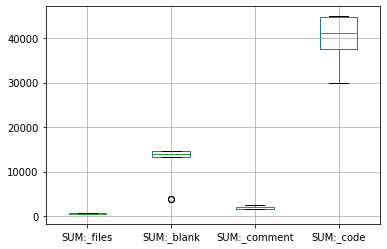

In [22]:
%matplotlib inline
ndf.boxplot()

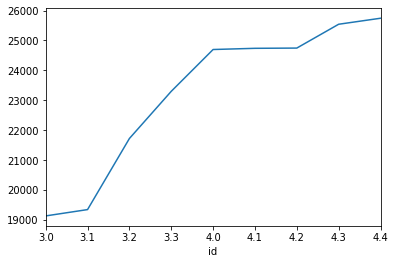

In [24]:
df.set_index("id")["Ruby_code"].plot()

Text(0.5, 0, 'Minor')

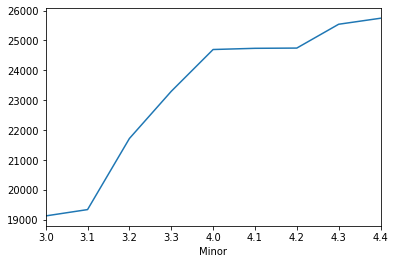

In [27]:
import matplotlib.pyplot as plt
ax = df.set_index("id")["Ruby_code"].plot()
ax.set_xlabel("Minor")

É possível aplicar operações em colunas e criar novas colunas. <span class="notebook-slide-extra" data-count="1"/>

In [28]:
df.loc[:, "tag"] = df["id"].apply(lambda minor: last_patch_for_v3v4[minor])

In [29]:
df

,id,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,SASS_files,...,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code,tag
0,3.0,334,1877,1360,19123,108,10891,22,15740,3,...,9.0,487,13211,1562,37570,NaN,NaN,NaN,NaN,3.0.0
1,3.1,334,1934,1361,19335,108,10891,22,15740,3,...,9.0,487,13273,1565,37798,NaN,NaN,NaN,NaN,3.1.0
2,3.2,362,2434,1383,21715,108,10891,22,15740,8,...,9.0,525,13944,1682,41185,NaN,NaN,NaN,NaN,3.2.1
3,3.3,394,2746,1525,23295,109,10901,22,15887,8,...,9.0,558,14282,1830,43125,NaN,NaN,NaN,NaN,3.3.7
4,4.0,445,2962,1651,24695,109,10903,22,15799,8,...,9.0,615,14549,2006,44845,NaN,NaN,NaN,NaN,4.0.4
5,4.1,447,2974,1665,24735,109,10903,22,15799,8,...,9.0,617,14562,2020,44892,NaN,NaN,NaN,NaN,4.1.1
6,4.2,447,2975,1665,24743,109,10903,22,15799,8,...,9.0,617,14563,2020,44900,NaN,NaN,NaN,NaN,4.2.0
7,4.3,503,3217,2095,25541,5,28,22,227,9,...,NaN,564,3881,2455,29865,1.0,0.0,3.0,0.0,4.3.14
8,4.4,506,3182,2037,25742,4,16,22,168,9,...,NaN,568,3822,2358,30036,1.0,0.0,3.0,0.0,4.4.27


Existem muitas outras operações que podem ser vistas na documentação: https://pandas.pydata.org/pandas-docs/stable/. <span class="notebook-slide-scroll" data-position="-1"/>

Continua: [9.Pygit2.ipynb](9.Pygit2.ipynb)

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


&nbsp;

&nbsp;

&nbsp;

